In [11]:
from rouge import Rouge
import pandas as pd
from pathlib import Path
import json


In [12]:
generated_sum = pd.read_csv("model/result_kg.csv", index_col=0)
generated_sum

,paper_id,gen_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper proposes a new algorithm for federa...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper proposes a new algorithm for federa...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper proposes a new algorithm for federa...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method for self-attentio...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method for self-attentio...
...,...,...
3599,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper proposes a method for learning repr...
3600,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper proposes a method for learning repr...
3601,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper proposes a unified formalism for gr...
3602,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper proposes a unified formalism for gr...


In [13]:
generated_sum = generated_sum.drop_duplicates()
generated_sum

,paper_id,gen_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper proposes a new algorithm for federa...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method for self-attentio...
6,SP:e3e728837f26acb9da283a42c219b6c3b3e131cb,This paper proposes a Bayesian Stackelberg Mar...
9,SP:97911e02bf06b34d022e7548beb5169a1d825903,This paper studies the problem of unsupervised...
12,SP:59f9de3ebe4a04d2fc8778d8e3415bf85efb7822,This paper proposes a zero-shot approach for a...
...,...,...
3589,SP:77b8bed08af8be8af0c65a72a6e22cfb02645d02,This paper proposes a hybrid method for variat...
3592,SP:64f2744e938bd62cd47c1066dc404a42134953da,This paper proposes a new method for causal in...
3595,SP:971d0d94adf5113ee1bef8df9ea7dbd508cf4cbc,This paper proposes a method for finding compa...
3598,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper proposes a method for learning repr...


In [14]:
RAWDATAFILES = {
    "train": "training_complete.jsonl",
    "val": "validation_complete.jsonl",
    "test": "testing_with_paper_release.jsonl"
}

In [15]:
def load_data(filepath):
    with open(filepath, 'r') as json_file:
        json_list = list(json_file)
    dataset = []
    data_len = len(json_list)
    for i, json_str in enumerate(json_list):
        result = json.loads(json_str)
        dataset.append({
            "paper_id": result["paper_id"], 
            "ref_sum": result["summary"]
        })
    return pd.DataFrame(dataset)

In [16]:
main_path = str((Path().absolute()).parents[0])
filepath = main_path+"/MuP_sum/dataset/"+RAWDATAFILES['val']
reference_sum = load_data(filepath)
reference_sum

,paper_id,ref_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,The paper proposed a differentially private tr...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This submission works on the neural machine tr...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method to introduce **pr...
...,...,...
3599,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper defines a set of learnable basis fu...
3600,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,A typical Wavelet Transform is built through t...
3601,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper builds a new graph convolutional ne...
3602,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...


In [17]:
summary_df = pd.merge(reference_sum, generated_sum, on='paper_id', how='inner')
summary_df

,paper_id,ref_sum,gen_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...,This paper proposes a new algorithm for federa...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...,This paper proposes a new algorithm for federa...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,The paper proposed a differentially private tr...,This paper proposes a new algorithm for federa...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This submission works on the neural machine tr...,This paper proposes a method for self-attentio...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method to introduce **pr...,This paper proposes a method for self-attentio...
...,...,...,...
3599,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper defines a set of learnable basis fu...,This paper proposes a method for learning repr...
3600,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,A typical Wavelet Transform is built through t...,This paper proposes a method for learning repr...
3601,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper builds a new graph convolutional ne...,This paper proposes a unified formalism for gr...
3602,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...,This paper proposes a unified formalism for gr...


In [18]:
# Define the reference and candidate texts
reference = list(summary_df['ref_sum'])
candidate = list(summary_df['gen_sum'])

In [19]:
def getScore(candidate, reference, score_type='f'):
    rouge = Rouge()
    scores = rouge.get_scores(candidate, reference)
    return [{
        'rouge-1': score['rouge-1'][score_type],
        'rouge-2': score['rouge-2'][score_type],
        'rouge-l': score['rouge-l'][score_type],
    } for score in scores]

In [21]:
f1_score = getScore(candidate, reference, score_type='f')
f1_score[0]

{'rouge-1': 0.439024385244233,
 'rouge-2': 0.14999999505000017,
 'rouge-l': 0.39024389743935495}

In [22]:
f1_df = pd.DataFrame(f1_score)
f1_df

,rouge-1,rouge-2,rouge-l
0,0.439024,0.150000,0.390244
1,0.340741,0.075676,0.340741
2,0.324324,0.116883,0.324324
3,0.420168,0.142012,0.369748
4,0.288136,0.074534,0.254237
...,...,...,...
3599,0.250000,0.054054,0.230769
3600,0.392157,0.076336,0.313725
3601,0.246753,0.076555,0.220779
3602,0.245902,0.024540,0.245902


In [23]:
f1_df.describe()

,rouge-1,rouge-2,rouge-l
count,3604.000000,3604.000000,3604.000000
mean,0.315669,0.080911,0.288550
std,0.068144,0.044611,0.064310
min,0.080000,0.000000,0.080000
25%,0.268041,0.049155,0.244444
50%,0.313043,0.074627,0.283582
75%,0.360360,0.105263,0.330097
max,0.621359,0.368000,0.610526


In [24]:
f1_df[f1_df['rouge-1']<0.1]

,rouge-1,rouge-2,rouge-l
300,0.097561,0.000000,0.085366
1501,0.080000,0.015873,0.080000
1776,0.088889,0.038835,0.088889


In [26]:
print_example(1501)

Reference:
The submission is not anonymized, the author's name chaoyanghe appears frequently in the attached SSFL_Sumpplementary/SSFL-Source-Code. Therefore, it should be directly desk rejected.  --- Logging error --- Traceback (most recent call last):   File "/Users/chaoyanghe/opt/anaconda3/envs/fedml/lib/python3.7/logging/__init__.py", line 1025, in emit     msg = self.format(record)   File "/Users/chaoyanghe/opt/anaconda3/envs/fedml/lib/python3.7/logging/__init__.py", line 869, in format     return fmt.format(record)   File "/Users/chaoyanghe/opt/anaconda3/envs/fedml/lib/python3.7/logging/__init__.py", line 608, in format     record.message = record.getMessage()   File "/Users/chaoyanghe/opt/anaconda3/envs/fedml/lib/python3.7/logging/__init__.py", line 369, in getMessage     msg = msg % self.args
Generation:
This paper proposes a personalized federated learning (SSFL) framework for self-supervised learning. The authors propose two algorithms: perFedAvg and Ditto to address label def

In [27]:
print_example(300)

Reference:
Generating a pruned network falls into two broad categories: 1) spend some extra time and effort to train or fine-tune the pruned model after first training a dense version, or 2) cut out that extra time and effort by generating a sparse network "from scratch."  While approach (1) has historically given the best accuracy, recent advances (such as the lottery ticket hypothesis) suggest that there are sparse networks hidden in the initialization that don't need to first be trained, if only we could divine the structure of those models.  Approach (2) seeks to do just this: determine the connectivity as close to initialization possible.  However, even the best results taking this second path fall short when compared to the accuracy of the former path - why is this?  The submission pokes at three recent techniques to pull out some commonalities that are *not* shared with (1), suggesting possible issues that need to be overcome to improve accuracy, and proposes a set of experiment

In [28]:
print_example(1776)

Reference:
The authors propose a new RNN architecture, long expressive memory (LEM), motivated by a system of ODEs with multiple time constants. They prove that it can avoid the vanishing gradient problem while retaining the flexibility to approximate a broad class of dynamical systems. They report comparable or improved prediction performance of LEM-based sequence models across a very wide variety of tasks, as compared to several recent alternatives.
Generation:
This paper proposes a method for learning long-term sequential dependencies. The method is based on a system of multiscale ordinary differential equations (MODE) and time-discretization. The proposed method is evaluated on image classification, keyword spotting and language modeling tasks.


In [29]:
f1_df[f1_df['rouge-1']>0.6]

,rouge-1,rouge-2,rouge-l
1635,0.610526,0.368000,0.610526
1873,0.621359,0.285714,0.504854


In [30]:
print_example(1635)

Reference:
This paper proposes a decomposition-based explanations method for graph neural networks.  In detail, the authors design a subgraph level interpretation algorithm to reveal complex interactions between graph nodes, so as to achieve the faithful explanation for GNN predictions. They demonstrate the effectiveness of the proposed method on synthetic and real-world datasets.   
Generation:
This paper proposes a method for improving the faithfulness of graph neural networks (GNNs). The main idea is to use a subgraph level interpretation algorithm to learn a faithful explanation of GNN predictions. The method is based on the idea that GNNs should be able to explain complex interactions between graph nodes. The main contribution of this paper is to propose a method to learn the faithful explanation for GNN. The proposed method is evaluated on both synthetic and real-world datasets.


In [31]:
print_example(1873)

Reference:
This paper studies the properties of applying gradient flow and gradient descent to deep linear networks on linearly separable data. For strictly decreasing loss like the logistic loss, this paper shows 1) the loss goes to 0, 2) for every layer the normalized weight matrix converges to a rank-1 matrix 3) these rank-1 matrices are aligned. For the logistic loss, this paper further shows the linear function is the maximum margin solution.
Generation:
This paper studies the asymptotic weight matrix alignment in deep linear networks with linearly separable data. The authors show that gradient flow and gradient descent converge to a linear function when the weight matrices of the network are rank-1 matrices. They also show that the gradient flow converges to the maximum margin solution of the logistic loss with decreasing step size. The paper also shows that gradient descent converges faster than gradient flow with increasing step size when the network is linearly separated.


In [32]:
import sys

def getDataset(data_split):
    main_path = str((Path().absolute()).parents[0])    
    filepath = f"{main_path}/MuP_sum/dataset/{RAWDATAFILES[data_split]}"
    with open(filepath, 'r') as json_file:
        json_list = list(json_file)
    dataset_list = []
    data_len = len(json_list)
    for i, json_str in enumerate(json_list):
        data = json.loads(json_str)
        dataset_list.append({
            "paper_id": data["paper_id"], 
            "input_seq": data["paper"]["abstractText"], 
            "target_seq": data["summary"]
        })   
        if i>100: break
    return pd.DataFrame(dataset_list)

In [33]:
getDataset("val")

,paper_id,input_seq,target_seq
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,Federated learning (FL) is a technique that tr...,This paper studies FL under local differential...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,Federated learning (FL) is a technique that tr...,This paper studies a low communication algorit...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,Federated learning (FL) is a technique that tr...,The paper proposed a differentially private tr...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,Self-attention networks (SANs) have shown prom...,This submission works on the neural machine tr...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,Self-attention networks (SANs) have shown prom...,This paper proposes a method to introduce **pr...
...,...,...,...
97,SP:d06bef9ee5e9bdda1571478b6a8a7a2d3ab42f1b,First-order stochastic methods for solving lar...,This paper proposed a Homotopy-Stochastic Grad...
98,SP:d06bef9ee5e9bdda1571478b6a8a7a2d3ab42f1b,First-order stochastic methods for solving lar...,1. It seems to me the proposed Homotopy-SGD is...
99,SP:195d090d9df0bda33103edcbbaf300e43f4562be,Estimating the 3D shape of real-world objects ...,This paper proposes a way of reconstructing a ...
100,SP:195d090d9df0bda33103edcbbaf300e43f4562be,Estimating the 3D shape of real-world objects ...,This paper introduces a meta-learning approach...


In [34]:
from pynvml import *
nvmlInit()
h = nvmlDeviceGetHandleByIndex(0)
info = nvmlDeviceGetMemoryInfo(h)
print(f'total    : {(info.total/1e9):.2f} GB')
print(f'free     : {(info.free/1e9):.2f} GB')
print(f'used     : {(info.used/1e9):.2f} GB')

total    : 51.53 GB
free     : 0.71 GB
used     : 50.81 GB


In [35]:
info.used/1e9

50.812092416

In [212]:
output_file = "result_kg_abstract.csv"
generated_sum = pd.read_csv(f"model/{output_file}", index_col=0)
generated_sum = generated_sum.drop_duplicates()
main_path = str((Path().absolute()).parents[0])
filepath = main_path+"/MuP_sum/dataset/"+RAWDATAFILES['val']
reference_sum = load_data(filepath)

summary_df = pd.merge(reference_sum, generated_sum, on='paper_id', how='inner')

(generated_sum)

,paper_id,gen_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper proposes a new algorithm for federa...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method for self-attentio...
6,SP:e3e728837f26acb9da283a42c219b6c3b3e131cb,This paper proposes a Bayesian Stackelberg Mar...
9,SP:97911e02bf06b34d022e7548beb5169a1d825903,This paper studies the problem of unsupervised...
12,SP:59f9de3ebe4a04d2fc8778d8e3415bf85efb7822,This paper proposes a zero-shot approach for a...
...,...,...
3589,SP:77b8bed08af8be8af0c65a72a6e22cfb02645d02,This paper proposes a hybrid method for variat...
3592,SP:64f2744e938bd62cd47c1066dc404a42134953da,This paper proposes a new method for causal in...
3595,SP:971d0d94adf5113ee1bef8df9ea7dbd508cf4cbc,This paper proposes a method for finding compa...
3598,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper proposes a method for learning repr...


In [213]:
reference_sum

,paper_id,ref_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,The paper proposed a differentially private tr...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This submission works on the neural machine tr...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method to introduce **pr...
...,...,...
3599,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper defines a set of learnable basis fu...
3600,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,A typical Wavelet Transform is built through t...
3601,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper builds a new graph convolutional ne...
3602,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...


In [214]:
summary_df

,paper_id,ref_sum,gen_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...,This paper proposes a new algorithm for federa...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...,This paper proposes a new algorithm for federa...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,The paper proposed a differentially private tr...,This paper proposes a new algorithm for federa...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This submission works on the neural machine tr...,This paper proposes a method for self-attentio...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method to introduce **pr...,This paper proposes a method for self-attentio...
...,...,...,...
3599,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper defines a set of learnable basis fu...,This paper proposes a method for learning repr...
3600,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,A typical Wavelet Transform is built through t...,This paper proposes a method for learning repr...
3601,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper builds a new graph convolutional ne...,This paper proposes a unified formalism for gr...
3602,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...,This paper proposes a unified formalism for gr...


In [215]:
output_file = "result_kg_summary.csv"
generated_sum = pd.read_csv(f"model/{output_file}", index_col=0)
generated_sum = generated_sum.drop_duplicates()
main_path = str((Path().absolute()).parents[0])
filepath = main_path+"/MuP_sum/dataset/"+RAWDATAFILES['val']
reference_sum = load_data(filepath)

summary_df = pd.merge(reference_sum, generated_sum, on='paper_id', how='inner')

(generated_sum)

,paper_id,gen_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies the problem of privacy-pres...
3,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper proposes a low communication algori...
6,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper proposes a differentially private t...
9,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper studies the neural machine translat...
12,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method to incorporate pr...
...,...,...
13089,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper proposes a joint learning algorithm...
13092,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper proposes a new construction of the ...
13095,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper proposes a new graph convolutional ...
13098,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper studies the problem of training GCN...


In [222]:
generated_sum.reset_index(drop=True, inplace=True)

In [224]:
summary_df = pd.concat([reference_sum, generated_sum], axis=1)
summary_df

,paper_id,ref_sum,paper_id,gen_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies the problem of privacy-pres...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper proposes a low communication algori...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,The paper proposed a differentially private tr...,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper proposes a differentially private t...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This submission works on the neural machine tr...,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper studies the neural machine translat...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method to introduce **pr...,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method to incorporate pr...
...,...,...,...,...
3599,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper defines a set of learnable basis fu...,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper proposes a joint learning algorithm...
3600,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,A typical Wavelet Transform is built through t...,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper proposes a new construction of the ...
3601,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper builds a new graph convolutional ne...,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper proposes a new graph convolutional ...
3602,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper studies the problem of training GCN...


In [225]:
reference = list(summary_df['ref_sum'])
candidate = list(summary_df['gen_sum'])

score = getScore(candidate, reference, score_type='f')
score_df = pd.DataFrame(score)
score_df.describe()

,rouge-1,rouge-2,rouge-l
count,3604.000000,3604.000000,3604.000000
mean,0.501470,0.237273,0.461477
std,0.099107,0.093870,0.098830
min,0.061224,0.000000,0.061224
25%,0.440000,0.173228,0.396694
50%,0.507355,0.232143,0.463346
75%,0.567568,0.295588,0.527473
max,0.792079,0.562500,0.764706


In [216]:
reference_sum

,paper_id,ref_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,The paper proposed a differentially private tr...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This submission works on the neural machine tr...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method to introduce **pr...
...,...,...
3599,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper defines a set of learnable basis fu...
3600,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,A typical Wavelet Transform is built through t...
3601,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper builds a new graph convolutional ne...
3602,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...


In [217]:
summary_df

,paper_id,ref_sum,gen_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...,This paper studies the problem of privacy-pres...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...,This paper proposes a low communication algori...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...,This paper proposes a differentially private t...
3,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...,This paper studies the problem of privacy-pres...
4,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...,This paper proposes a low communication algori...
...,...,...,...
13099,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...,This paper studies the problem of training GCN...
13100,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...,This paper studies the problem of representati...
13101,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,"In this paper, the authors address representat...",This paper proposes a new graph convolutional ...
13102,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,"In this paper, the authors address representat...",This paper studies the problem of training GCN...


In [141]:
print(list(generated_sum.loc[[13089]]['gen_sum'])[0], '\n')
print(list(generated_sum.loc[[13092]]['gen_sum'])[0])

This paper proposes a new graph convolutional network (GCN) based on hyperbolic representations of the graph nodes. The GCN is based on the Mobius matrix-vector multiplication, where the right matrix multiplication of GCN consists of a weighted linear combination of the weights of the original node and the weighted barycenter. The computational geometry and the machine learning community are well motivated. The proposed method is evaluated on a toy problem and semi-supervised node classification. 

This paper studies the problem of training GCNs in non-Euclidean spaces. The main contribution of this paper is to propose to use embeddings for non-euclidean models and to use these for GCN operations. This is a natural extension of the idea of embedding in Euclidean space. The paper is well-written and easy to follow, and the results are convincing. However, the paper is not well-motivated, and there are many grammatical errors and typos in the paper, which makes the paper difficult to fol

In [170]:
def calRouge(inputType='kg', section='abstract'):
    generated_sum = pd.read_csv(f"model/result_{inputType}_{section}.csv", index_col=0)
    if section=='summary':
        generated_sum = generated_sum.drop_duplicates()
    main_path = str((Path().absolute()).parents[0])
    filepath = main_path+"/MuP_sum/dataset/"+RAWDATAFILES['val']
    reference_sum = load_data(filepath)
    
    summary_df = pd.merge(reference_sum, generated_sum, on='paper_id', how='inner')
    
    reference = list(summary_df['ref_sum'])
    candidate = list(summary_df['gen_sum'])
    
    score = getScore(candidate, reference, score_type='f')
    score_df = pd.DataFrame(score)
    return summary_df, score_df

In [178]:
abs_text_data, abs_text_score = calRouge(inputType='text', section='abstract')
abs_text_score.describe()

,rouge-1,rouge-2,rouge-l
count,13104.000000,13104.000000,13104.000000
mean,0.319775,0.087505,0.289468
std,0.078043,0.066710,0.076373
min,0.044118,0.000000,0.044118
25%,0.267717,0.046512,0.238532
50%,0.310811,0.072072,0.280000
75%,0.361905,0.109091,0.327586
max,0.834951,0.757576,0.800000


In [179]:
abs_kg_data, abs_kg_score = calRouge(inputType='kg', section='abstract')
abs_kg_score.describe()

,rouge-1,rouge-2,rouge-l
count,13104.000000,13104.000000,13104.000000
mean,0.316231,0.081455,0.289072
std,0.068300,0.044617,0.064410
min,0.080000,0.000000,0.080000
25%,0.268657,0.050000,0.244604
50%,0.313725,0.075188,0.283871
75%,0.361702,0.105882,0.330275
max,0.621359,0.368000,0.610526


In [209]:
sum_kg_data, sum_kg_score = calRouge(inputType='kg', section='summary')
sum_kg_score.describe()

,rouge-1,rouge-2,rouge-l
count,13104.000000,13104.000000,13104.000000
mean,0.349561,0.112127,0.320229
std,0.118920,0.096627,0.112368
min,0.046512,0.000000,0.046512
25%,0.265487,0.046154,0.241379
50%,0.316547,0.076923,0.288660
75%,0.411854,0.146423,0.376068
max,0.792079,0.562500,0.764706


In [210]:
sum_kg_data

,paper_id,ref_sum,gen_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...,This paper studies the problem of privacy-pres...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...,This paper proposes a low communication algori...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...,This paper proposes a differentially private t...
3,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...,This paper studies the problem of privacy-pres...
4,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...,This paper proposes a low communication algori...
...,...,...,...
13099,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...,This paper studies the problem of training GCN...
13100,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...,This paper studies the problem of representati...
13101,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,"In this paper, the authors address representat...",This paper proposes a new graph convolutional ...
13102,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,"In this paper, the authors address representat...",This paper studies the problem of training GCN...


In [203]:
df_boxplot = pd.melt(abs_text_score, value_vars=['rouge-1','rouge-2','rouge-l'], var_name="score")
df_boxplot["input"] = "abs_text"

In [204]:
df_boxplot_ = pd.melt(abs_kg_score, value_vars=['rouge-1','rouge-2','rouge-l'], var_name="score")
df_boxplot_["input"] = "abs_kg"

In [205]:
df_boxplot = pd.concat([df_boxplot, df_boxplot_])

In [206]:
df_boxplot_ = pd.melt(sum_kg_score, value_vars=['rouge-1','rouge-2','rouge-l'], var_name="score")
df_boxplot_["input"] = "sum_kg"
df_boxplot = pd.concat([df_boxplot, df_boxplot_])

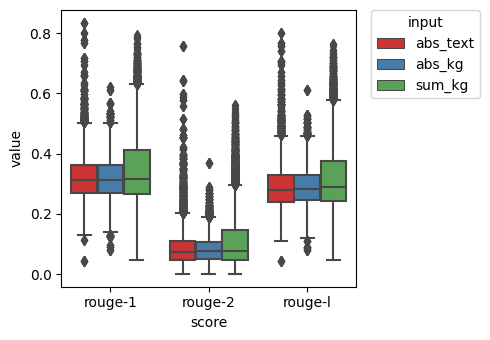

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [5, 3.50]
plt.rcParams["figure.autolayout"] = True

# plt.figure(figsize=(5, 4)) #for a bigger image
sns.boxplot(x="score", y="value", hue="input", data=df_boxplot, palette="Set1")
plt.legend(bbox_to_anchor=(1.05, 1), title="input", loc='upper left', borderaxespad=0)


In [102]:
kgSum_sum

,paper_id,ref_sum,gen_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...,This paper studies the problem of privacy-pres...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...,This paper proposes a low communication algori...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...,This paper proposes a differentially private t...
3,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...,This paper studies the problem of privacy-pres...
4,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...,This paper proposes a low communication algori...
...,...,...,...
13099,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...,This paper studies the problem of training GCN...
13100,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...,This paper studies the problem of representati...
13101,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,"In this paper, the authors address representat...",This paper proposes a new graph convolutional ...
13102,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,"In this paper, the authors address representat...",This paper studies the problem of training GCN...


In [103]:
abs_kg_sum

,paper_id,ref_sum,gen_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...,This paper proposes a new algorithm for federa...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...,This paper proposes a new algorithm for federa...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,The paper proposed a differentially private tr...,This paper proposes a new algorithm for federa...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This submission works on the neural machine tr...,This paper proposes a method for self-attentio...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method to introduce **pr...,This paper proposes a method for self-attentio...
...,...,...,...
3599,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper defines a set of learnable basis fu...,This paper proposes a method for learning repr...
3600,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,A typical Wavelet Transform is built through t...,This paper proposes a method for learning repr...
3601,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper builds a new graph convolutional ne...,This paper proposes a unified formalism for gr...
3602,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...,This paper proposes a unified formalism for gr...


In [104]:
abs_fulltext_sum

,paper_id,ref_sum,gen_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...,This paper studies the problem of privacy-pres...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...,This paper studies the problem of privacy-pres...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,The paper proposed a differentially private tr...,This paper studies the problem of privacy-pres...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This submission works on the neural machine tr...,This paper proposes a self-attention network (...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method to introduce **pr...,This paper proposes a self-attention network (...
...,...,...,...
3599,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper defines a set of learnable basis fu...,This paper proposes a method for learning repr...
3600,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,A typical Wavelet Transform is built through t...,This paper proposes a method for learning repr...
3601,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper builds a new graph convolutional ne...,This paper proposes a generalization of graph ...
3602,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...,This paper proposes a generalization of graph ...


In [ ]:
all_result = pd.copy

In [86]:
def print_example(summary_df, i):
    print("Reference:")
    print(summary_df.iloc[i]['ref_sum'])
    print("Generation:")
    print(summary_df.iloc[i]['gen_sum'])

In [90]:
print_example(abs_kg_sum, 1635)


Reference:
This paper proposes a decomposition-based explanations method for graph neural networks.  In detail, the authors design a subgraph level interpretation algorithm to reveal complex interactions between graph nodes, so as to achieve the faithful explanation for GNN predictions. They demonstrate the effectiveness of the proposed method on synthetic and real-world datasets.   
Generation:
This paper proposes a method for improving the faithfulness of graph neural networks (GNNs). The main idea is to use a subgraph level interpretation algorithm to learn a faithful explanation of GNN predictions. The method is based on the idea that GNNs should be able to explain complex interactions between graph nodes. The main contribution of this paper is to propose a method to learn the faithful explanation for GNN. The proposed method is evaluated on both synthetic and real-world datasets.


In [91]:
print_example(abs_fulltext_sum, 1635)


Reference:
This paper proposes a decomposition-based explanations method for graph neural networks.  In detail, the authors design a subgraph level interpretation algorithm to reveal complex interactions between graph nodes, so as to achieve the faithful explanation for GNN predictions. They demonstrate the effectiveness of the proposed method on synthetic and real-world datasets.   
Generation:
This paper proposes a decomposition based explanation for Graph Neural Networks (GNNs). The main idea is to decompose the information generation and aggregation mechanism of GNNs, which allows tracking the contributions of specific components of the input graph to the final prediction. Based on this, the authors further design a subgraph level interpretation algorithm to reveal complex interactions between graph nodes that are overlooked by previous methods. The efficiency of the algorithm can be further improved by utilizing GNN characteristics. Experiments on synthetic and real-world datasets

In [211]:
main_path = str((Path().absolute()).parents[0])
filepath = main_path+"/MuP_sum/dataset/"+RAWDATAFILES['val']
reference_sum = load_data(filepath)
reference_sum

,paper_id,ref_sum
0,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies FL under local differential...
1,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,This paper studies a low communication algorit...
2,SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96,The paper proposed a differentially private tr...
3,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This submission works on the neural machine tr...
4,SP:632666b52c7c551d67fbbe70c06ed589c3a5e187,This paper proposes a method to introduce **pr...
...,...,...
3599,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,This paper defines a set of learnable basis fu...
3600,SP:18aaba3423e81e9437b509d1a5e24836ef5635f6,A typical Wavelet Transform is built through t...
3601,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,This paper builds a new graph convolutional ne...
3602,SP:3058e6bc5e8c62af325c214c9e1436d6cdf09204,The authors propose using non-Euclidean spaces...


In [230]:
reference_sum[reference_sum["paper_id"]=="SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96"]["ref_sum"][0]

'This paper studies FL under local differential privacy constraints. They identify two major concerns in designing practical privacy-preserving FL algorithms: communication efficiency and high\x02dimensional compatibility, and develop a gradient-based learning algorithm sqSGD that addresses both concerns. They improve the base algorithm in two ways: First, apply a gradient subsampling strategy that offers simultaneously better training performance and smaller communication costs. Secondly, utilize randomized rotation as a preprocessing step to reduce quantization error. '